In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


# **Problem statement: predict Height based on Weight**

In [38]:
X = df['Weight']
y = df['Height']

In [39]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [40]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [42]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((18,), (5,), (18,), (5,))

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [44]:
scaler

StandardScaler()

In [45]:
X_train = scaler.fit_transform(np.array(X_train).reshape(-1,1))
X_test = scaler.transform(np.array(X_test).reshape(-1,1))

In [46]:
X_train

array([[-1.4611864 ],
       [ 0.44730196],
       [-0.26838118],
       [-1.58046693],
       [ 0.08946039],
       [ 0.32802144],
       [ 0.92442405],
       [-0.98406431],
       [ 0.62622274],
       [-1.75938771],
       [ 0.20874091],
       [-0.14910065],
       [-1.10334484],
       [ 0.20874091],
       [ 1.22262536],
       [ 1.81902797],
       [ 1.22262536],
       [ 0.20874091]])

In [47]:
X_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

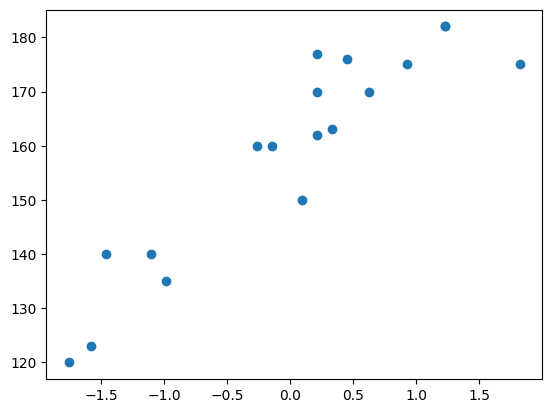

In [48]:
plt.scatter(X_train,y_train)


# **Model training**

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor

LinearRegression()

In [50]:
regressor.fit(X_train,y_train)

LinearRegression()

In [51]:
regressor.coef_

array([17.73635106])

In [52]:
regressor.intercept_

np.float64(158.88888888888889)

In [53]:
print(f"The slope or coefficient of model is: {regressor.coef_}")
print(f"The intercept of model is: {regressor.intercept_}")

The slope or coefficient of model is: [17.73635106]
The intercept of model is: 158.88888888888889


In [54]:
regressor.predict(X_train)

array([132.97277388, 166.82239348, 154.12878613, 130.85717266,
       160.47558981, 164.70679226, 175.28479838, 141.43517878,
       169.99579532, 127.68377082, 162.59119103, 156.24438736,
       139.31957756, 162.59119103, 180.57380145, 191.15180757,
       180.57380145, 162.59119103])

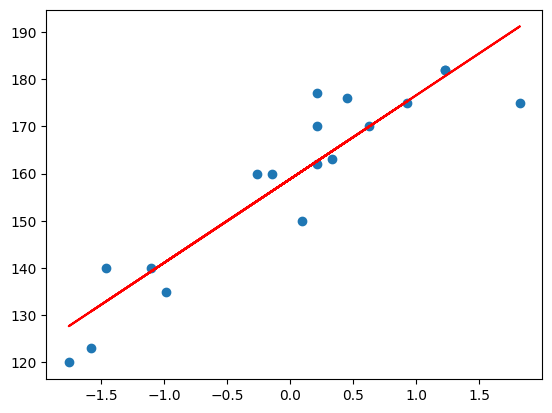

In [55]:
plt.scatter(X_train,y_train)
plt.plot()
plt.plot(X_train,regressor.predict(X_train),color='red')

In [56]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
       172.11139655])

In [57]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167


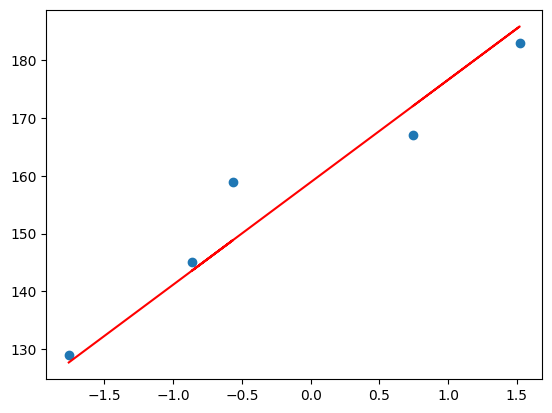

In [58]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='red')

## **Performance Metrics;**

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test,y_pred_test)
mse

28.276946048811972

In [60]:
mae = mean_absolute_error(y_test,y_pred_test)
mae

4.179973432576932

In [61]:
r2 = r2_score(y_test,y_pred_test)
r2

0.9171832648523548

In [62]:
adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r2

0.8895776864698064

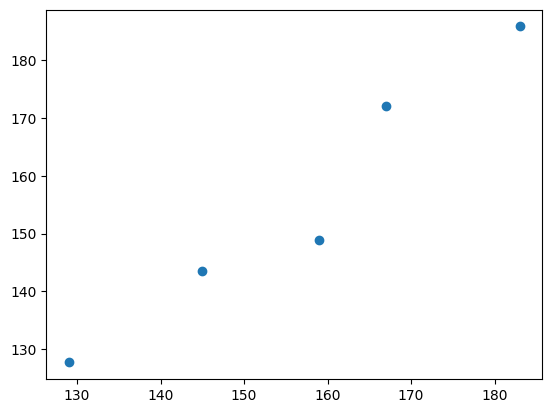

In [64]:
plt.scatter(y_test,y_pred_test)

<Axes: xlabel='Height', ylabel='Density'>

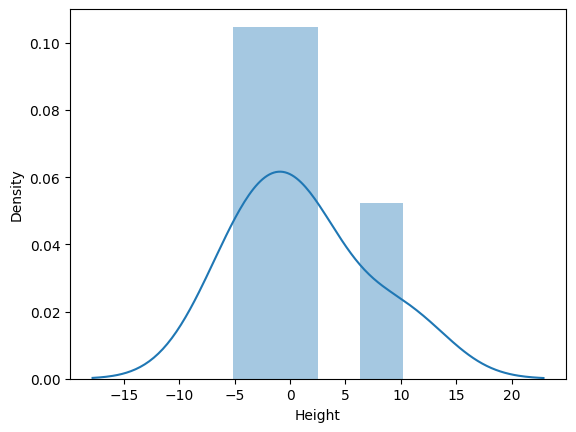

In [65]:
error = y_test - y_pred_test
sns.distplot(error)

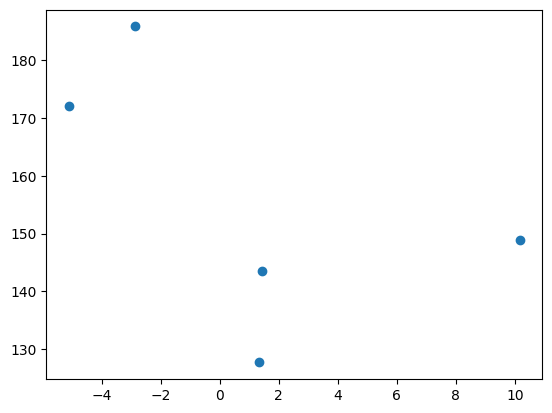

In [66]:
plt.scatter(error,y_pred_test)